# <a id='toc1_'></a>[Quantum chemistry survey](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique

Janvier 2024

### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

1. Etudier la convergence des ensembles de base pour une série de fonctionnelles de la
théorie fonctionnelle de la densité (DFT) (non hybrides (PBE, TPSS) et hybrides
(B3LYP)).
2. Comparer les calculs DFT, MP2, CCSD et CCSD(T).
3. Calculer les propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,
Oscillator strength, Lifetime, Multi-objective function.
4. Tracer le spectre UV/Vis avec les trois fonctionnelles précédentes.

` NB`: Tous les résultats seront commentés/analysés. L'intérêt de chaque molécule étudiée sera
spécifié. N'hésitez pas à faire des recherches supplémentaires. Vous êtes en Master!!

### <a id='toc1_4_2_'></a>[SOLUTION](#toc0_)

####  <a id='toc1_3_'></a>[Utilisation de `RDKIT`pour la generer des coordonnees 3D xyz](#toc0_)
<!-- ![Rdkit.png](attachment:Rdkit.png) -->
![Rdkit.png](./Graphics/Rdkit.png)

soit la molecules `1,3-Thiazole` utilisé comme agent aromatisant ; [FDA] Utilisé pour fabriquer des fongicides, des colorants et des accélérateurs de caoutchouc ; [NTP],qui seras notre molecules d'etude 

In [1]:
#importation des packages  rdkit
from rdkit import Chem

#### **Creation `RDKit` d'un objet moleculair**

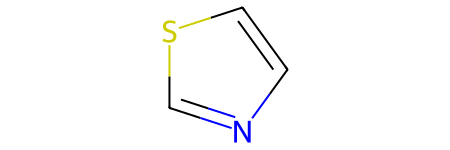

In [2]:

#  Convertir le SMILES en objet RDKit Mol
smiles = "C1=CSC=N1"#https://pubchem.ncbi.nlm.nih.gov/compound/Thiazole
mol = Chem.MolFromSmiles(smiles)
mol

### **Ajouter des atomes H a mon objet  mol pour la structure 3D**

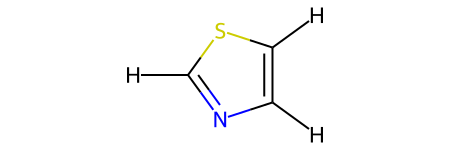

In [3]:

mol = Chem.AddHs(mol)
mol

In [4]:
#observer le nombres d'atomes de mon objet mol 
mol.GetNumAtoms()

8

### **Generer  des `conformers`  et de les intégrer à la structure 3D**



In [5]:
# importation  des modules Allchem et Chem de rdkit
from rdkit.Chem import AllChem


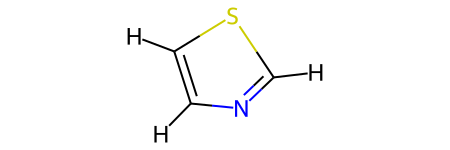

In [6]:
confid = AllChem.EmbedMolecule(mol)
mol

### **`Optimisation` de la structure 3D de notre objet mol avec ``MMFF94``**

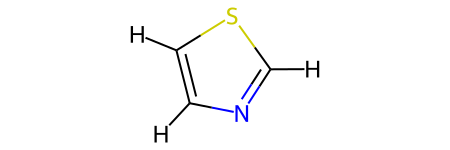

In [7]:
AllChem.UFFOptimizeMolecule(mol)
mol

### **Generation  des coordonnees 3D des atomes de la structure optimise**

In [8]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.6491093601269846 -0.7509542454920527 0.011544518904899362
C -0.9876983948713984 0.5959729201681198 0.024191890481892724
S 0.42995939929929855 1.475850502068132 0.22418310986670478
C 1.4103775995127819 0.11280857266606842 0.2859861766860487
N 0.6773641676541661 -1.014156299545265 0.15650975641278797
H -1.380324948157459 -1.5394393715240071 -0.10460299553272669
H -1.9849607396769269 1.002212508603418 -0.0767300029956962
H 2.484392276366539 0.11770541305565448 0.4118010611362812


### **Convertir l'objet mol RDKit en format XYZ**

In [9]:
mol_xyz = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])

#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)

<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/MolecularDimension.png)

1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.

### <a id='toc1_4_2_'></a>[SOLUTION](#toc0_)

## <a id='toc1_1_'></a>[PySCF](#toc0_)

<!-- ![Pyscf.png](attachment:Pyscf.png) -->
![Pyscf.png](./Graphics/Pyscf.png)

In [10]:
import pyscf

pyscf.__version__

'2.4.0'

In [11]:
from pyscf import gto
mol = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,  # 2j == nelec_alpha - nelec_beta
    basis = 'cc-pVDZ',
    symmetry = True, # Allow the program to apply point group symmetry if possible
    unit = 'Angstrom',
    )
mol.build()

#### <a id='toc1_1_'></a>[Visualisation de la représentation  3D des molécules en 3D avec `py3Dmol`](#toc0_)


In [12]:
# 3D representation
import py3Dmol
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}, "sphere":{"radius":0.4}})
xyz_view.setBackgroundColor('0xeeeeee')
xyz_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 44 et le nombre total d'électrons (alpha, béta) est (22, 22)
Le nombre d'orbitales atomiques, dans la base cc-pVDZ, est 89
L'énergie nucléaire vaut 206.59453232010438 Hartrees


### <a id='toc1_1_'></a>1.[Etudions la convergence des ensembles de base pour une série de fonctionnelles de la théorie fonctionnelle de la densité (DFT) (non hybrides (PBE, TPSS) et hybrides](#toc0_)



## <a id='toc1_4_'></a>[Calcul du champ moyen ou mean-field](#toc0_)
Les trois méthodes HF communément utilisées sont (voir la figure ci-dessous) :
![HF_Orb.png](./Graphics/HF_Orb.png)
<!-- <center>
 <img src='./Graphics/HF_Orb.png' width=400 /> 
</center> -->

1. **RHF (Restricted Hartree – Fock)** utiliśee pour des molécules à couches pleines ou fermées. Les spin-orbitales sont soit $\alpha$, soit $\beta$ et tous les orbitales sont doublement occupés par des spin-orbitales $\alpha$ et $\beta$;</br> 
2. **ROHF (Restricted Open-Shell Hartree–Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. ROHF utilise autant que possible les orbitales doublement occupées et les orbitales une fois occupées par les électrons non-apariés;
3. **UHF (Unrestricted Hartree-Fock)** utilisée pour des molécules à couches ouvertes où le nombre d'électrons les orbitales n'est pas le même. Les orbitales UHF peuvent avoir avoir des spin $\alpha$ ou $\beta$, mais les orbitales $\alpha$ et $\beta$ peuvent avoir des composants spatiales différents.

Les équivalents DFT sont,

4. **RKS (Kohn-Sham restreint)**,
6. **ROKS (Restricted Open-Shell Kohn – Sham)**,
5. **UKS (Kohn-Sham sans restriction)**.

_soit la smile `C1=CSC=N1`,Pour calculer la configuration électronique de la smile C1=CSC=N1,._

En utilisant la règle de l'octet, nous pouvons déterminer que la configuration électronique de la smile C1=CSC=N1 est la suivante :

* Carbone Z=6: $1s^{2} 2s^{2} 2p^{2}$
* Soufre Z=16: $1s^{2} 2s^{2} 2p^{6} 3s^{2} 2p^{6}$
* Azote z=7: $1s^{2} 2s^{2} 2p^{3}$

_nous devons d'abord déterminer le nombre de valence électrons de chaque atome_.

* Carbone (C) : 4 valence électrons
* Soufre (S) : 8 valence électrons spin(0)
* Azote (N) : 5 valence électrons

Les hf et dft a utliser sont respectivement `RHF`et `RKS`

In [14]:
import numpy as np

# Define the functionals of the density functional theory (DFT)
functionals = ['PBE', 'TPSS', 'B3LYP']

# Define the calculation methods
methods = ['DFT', 'MP2', 'CCSD', 'CCSD(T)']

In [15]:
from pyscf import dft
import time
# Initialize the dictionary to store the energies
values = {functional: [] for functional in functionals}

# Perform the calculations
for functional in functionals:
    start = time.time()
    myks = dft.RKS(mol, xc=functional).run()
    end = time.time()
    values[functional].append(myks.e_tot)
    values[functional].append(end - start)

# Print the results
for functional, energie in values.items():
    print(f'{functional}: {energie[0]:.4f} eV, {energie[1]:.4f} seconds')

/home/mvoto/miniconda3/envs/tartarus/lib/python3.8/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -568.681285884098
converged SCF energy = -569.116081719473
converged SCF energy = -569.069362597561
PBE: -568.6813 eV, 25.8194 seconds
TPSS: -569.1161 eV, 71.6025 seconds
B3LYP: -569.0694 eV, 26.5188 seconds


#### _Selon les résultats du calcul SCF, nous pouvons voir que la fonctionnelle `PBE` fournit une énergie superieux  de valeur `-568.6813 eV`,avec un temps relativement moyen de `68.3467 seconds` à celles des fonctionnelles `B3LYP` qui  offre une energie de moyen `-569.0694eV` pour un temps minimal `59.3842 seconds` et `TPSS` qui offent une energie tres faible `-569.1161 eV` pour un temps de calcule tres grands `124.1959` seconds des les autres .on peut donc conclure par rapport au temps de calcules et la valeurs d'energie que la fonctionnelle  hybride `B3LYP` reste la methode la plus approprier pour cette molecule_

### <a id='toc1_1_'></a>2.[Comparons les calculs DFT, MP2, CCSD et CCSD(T)](#toc0_)

#### <a id='toc1_1_'></a>2.1[ calcule DFT](#toc0_)

In [16]:
start = time.time()
mdf=dft.RKS(mol, xc="B3LYP").run()
mdf_time = time.time() - start

converged SCF energy = -569.069362597562


#### <a id='toc1_1_'></a>2.2[Calcule MP2, CCSD et CCSD(T)](#toc0_)

#### <a id='toc1_1_'></a>2.2.1[Calcule du MF (mean field)](#toc0_)

In [17]:
from pyscf import scf
start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 

converged SCF energy = -567.310342557446


#### <a id='toc1_1_'></a>2.2.2[Calcule du MP2(Møller-Plesset ) ](#toc0_)
La [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) effectue des corrections perturbatives de l'approximation Hartree-Fock.

In [18]:
from pyscf import mp
start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start +  myhf_time
energie1=mymp2.e_tot
print(energie1)

E(MP2) = -568.021321861972  E_corr = -0.710979304526213
E(SCS-MP2) = -567.994770045136  E_corr = -0.684427487689739
-568.021321861972


#### <a id='toc1_1_'></a>2.2.3[Calcule du  CCSD avec CC](#toc0_)
* La [CC(Coupled_cluster)](https://en.wikipedia.org/wiki/Coupled_cluster) est une méthode perturbative qui améliore l'approximation de Hartree-Fock.

In [19]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start +myhf_time
energie2=mycc.e_tot
print(energie2)

E(CCSD) = -568.0433171160391  E_corr = -0.7329745585929274
-568.0433171160391


#### <a id='toc1_1_'></a>2.2.4[Calcule du  CCSD(T) avec CCSD](#toc0_)

In [20]:
start = time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -0.0329794304219467


##### creation d'un dataframe avec `pandas` 

In [21]:
mf_times = [mdf_time, mymp2_time, mycc_time, mycct_time]
energies = [mdf.e_tot,energie1,energie2,energie2+e_ccsd_t]

In [22]:
# Create the results dataframe
import pandas as pd

df_HF = pd.DataFrame({"Methodes":methods, 
                      'Total energy':energies,
                      "Time":mf_times})

df_HF

,Methodes,Total energy,Time
0,DFT,-569.069363,27.238013
1,MP2,-568.021322,3.458126
2,CCSD,-568.043317,92.618757
3,CCSD(T),-568.076297,99.742368


#### utilisation de `Matplotlib` pour generer des figures avec 'plt`

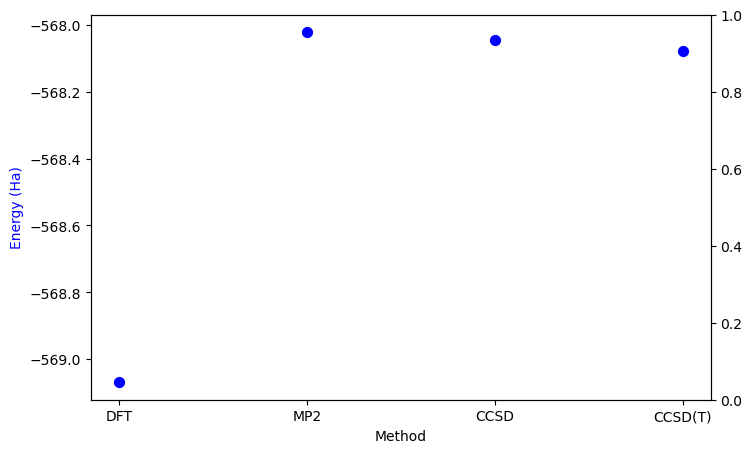

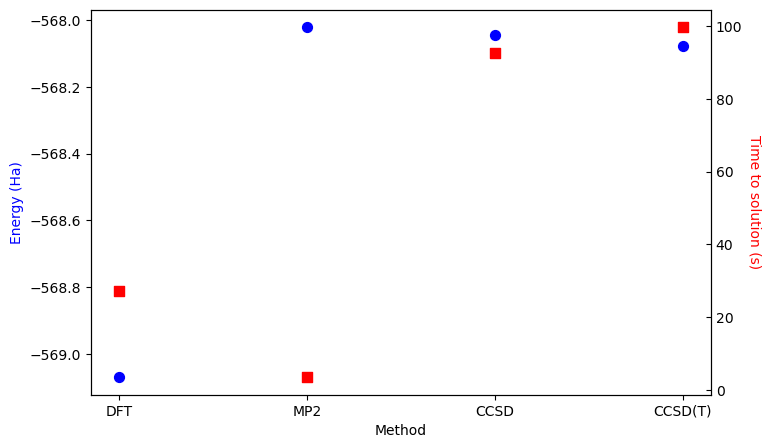

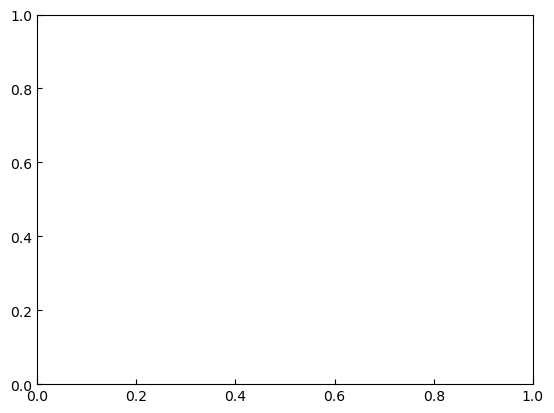

In [23]:
# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b") 
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")
# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

### <a id='toc1_1_'></a>[Intepretation des resultats obtenus](#toc0_)


_la `dft` donne un resultat plus precis que les methodes amelioration `HF` et un temps de calcul plus raisonable que les methodes `CCSD` et `CCSD(T)`, on note aussi que parmis les methodes d'amelioration  `HF` seul `MP2` a un meilleurs rapidite d'execussion surperieur a celle `dft` et un resultat de valeurs d;energie proche de ce dernier_

### <a id='toc1_1_'></a>3.[ Calculer les propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,Oscillator strength, Lifetime, Multi-objective function.](#toc0_)


#### <a id='toc1_1_'></a>3.1[ Definition d'une fonction qui calcule les propriétés Gap energy, Fluorescence energy, Singlet-Triplet gap,Oscillator strength, Lifetime, Multi-objective function et l'aient en sortie en prenant en entre `numpy`,l'accelerite `c`, la conversion en du hartree en eV `au2ev` le mf `mypyscf` et le calcule TDDFT `mvoto`.](#toc0_)

In [24]:
def find_energy(mypyscf, au2ev,mvoto,c,np):
    """Function that returns the HOMO and LUMO index with the gap energy,the Singlet excitation ,the Triplet excitation ,the fluorescence energy ,the Singlet-Tiplet gap , the Oscillator strength in eV with also Lifetime and Multi-Objective function 
to
    Args:
        mypyscf (pyscf object): pyscf meam-field object of the molecule mytd be evaluated.
    """
    # Index of HOMO and LUMOmytd
    lumo_idx = mypyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the gap Homo-LUMO
    E_HOMO = mypyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mypyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)
    # Singlet excitation energies
    ee_singlets = mvoto.e
    # Triplet excitation energies
    ee_triplets = mvoto.e
    # Singlet oscillators strength
    OS_singlets = mvoto.oscillator_strength(gauge='length')
    # fluorescence energy
    f_energy = min(ee_singlets)

    # Singlet-Tiplet gap
    gap_ST = min(ee_singlets) - min(ee_triplets)

    # Oscillator strength
    OStr = OS_singlets[0]

    #Lifetimemytd
    time_au = 2.4188843265857E-17 # in au

    tau_au = c**3 / (2 * (f_energy)**2 * OStr) # in au
    tau = tau_au * time_au # in seconds
    # Multi-Objective function
    mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)

    return E_HOMO, E_LUMO, E_g,ee_singlets,ee_triplets, f_energy,gap_ST,OStr,tau,mobj 

In [25]:
from pyscf.data import nist
#conversion en eV
au2ev = nist.HARTREE2EV
# Lifetime calculation in au
c = nist.LIGHT_SPEED # in au

In [26]:
mdf.kernel()
mdf.analyze()

converged SCF energy = -569.069362597563
**** MO energy ****
MO #1   energy= -88.9212913312517  occ= 2
MO #2   energy= -14.3315410214148  occ= 2
MO #3   energy= -10.2478481147781  occ= 2
MO #4   energy= -10.2214725270158  occ= 2
MO #5   energy= -10.2201270301353  occ= 2
MO #6   energy= -7.98573818215122  occ= 2
MO #7   energy= -5.94839585348503  occ= 2
MO #8   energy= -5.94451106525097  occ= 2
MO #9   energy= -5.94279650867891  occ= 2
MO #10  energy= -0.962805817312392 occ= 2
MO #11  energy= -0.808307258914902 occ= 2
MO #12  energy= -0.748167783021862 occ= 2
MO #13  energy= -0.59493025395729  occ= 2
MO #14  energy= -0.577600946586222 occ= 2
MO #15  energy= -0.507619131839435 occ= 2
MO #16  energy= -0.436615125939254 occ= 2
MO #17  energy= -0.430356208645333 occ= 2
MO #18  energy= -0.413658327169759 occ= 2
MO #19  energy= -0.36348510236008  occ= 2
MO #20  energy= -0.286758202335861 occ= 2
MO #21  energy= -0.26821843536015  occ= 2
MO #22  energy= -0.254626707112299 occ= 2
MO #23  energy=

((array([1.99989200e+00, 9.73646655e-01, 6.26721925e-03, 9.51365704e-01,
         1.03992561e+00, 1.02604631e+00, 1.04826997e-02, 1.03217311e-02,
         1.65428354e-03, 2.54383817e-03, 8.52401765e-04, 1.74636333e-03,
         1.61608446e-03, 2.64860828e-03, 1.99989066e+00, 1.03799210e+00,
         4.50288718e-03, 1.05679505e+00, 1.03362515e+00, 1.12808494e+00,
         6.61099708e-03, 6.56359621e-03, 4.01362632e-03, 2.71240415e-03,
         8.26972772e-04, 2.41787159e-03, 1.53459359e-03, 1.31980727e-03,
         1.99999899e+00, 1.99978890e+00, 1.63186437e+00, 6.15398074e-03,
         1.99987559e+00, 1.99991118e+00, 1.99992067e+00, 9.91695057e-01,
         1.40504973e+00, 1.56935708e+00, 1.63047988e-02, 5.88327259e-03,
         2.29050260e-03, 1.13290069e-02, 5.32313460e-03, 6.30248458e-03,
         9.95112607e-03, 4.64309375e-03, 1.99989458e+00, 1.03213885e+00,
         5.45812527e-03, 1.08149029e+00, 9.11914157e-01, 1.08273112e+00,
         7.03166739e-03, 1.33737726e-02, 3.72451616

### Calculs des états excités singulets avec la TDDFT

Effectuons les calculs sans l'approximation TDA.
![Abs_emiss.png](Graphics/Abs_emiss.png)

In [27]:
from pyscf import tddft
mytd = tddft.TDDFT(mdf)
mytd.kernel()
mytd.analyze(verbose=4)

TD-SCF states [0, 1, 2] not converged.
Excited State energies (eV)
[4.11950134 5.09156101 5.82929123]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      4.11950 eV    300.97 nm  f=0.6726
      10 -> 24        0.12681
      12 -> 24        0.12983
      14 -> 23        0.12574
      16 -> 26       -0.10602
      17 -> 24        0.11016
      17 -> 33       -0.12364
      18 -> 24       -0.24765
      19 -> 23        0.17879
      20 -> 26        0.15115
      21 -> 23       -0.42043
      21 -> 26        0.20846
      22 -> 24        0.15695
      22 -> 27       -0.11447
      22 -> 28       -0.13551
Excited State   2:    A      5.09156 eV    243.51 nm  f=0.0002
      21 -> 23       -0.70559
Excited State   3:    A      5.82929 eV    212.69 nm  f=0.0917
      20 -> 23        0.11918
      20 -> 24        0.10465
      22 -> 23       -0.67202
      22 -> 24        0.10097

** Transition electric dipole moments (AU) **
state          X           Y    

Effectuons les calculs avec l'approximation TDA.

In [28]:
mytda = tddft.TDA(mdf)
mytda.kernel()
mytda.analyze(verbose=4)

Excited State energies (eV)
[5.1196349  6.09954121 6.5633223 ]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      5.11963 eV    242.17 nm  f=0.0002
      21 -> 23        0.70543
Excited State   2:    A      6.09954 eV    203.27 nm  f=0.1006
      20 -> 23       -0.24593
      20 -> 24       -0.13604
      21 -> 25        0.11440
      22 -> 23        0.59424
      22 -> 24       -0.17632
Excited State   3:    A      6.56332 eV    188.90 nm  f=0.0744
      20 -> 23        0.55440
      21 -> 25       -0.12515
      22 -> 23        0.30060
      22 -> 24        0.24015

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.0047      0.0016     -0.0400      0.0016      0.0002
  2         0.6368     -0.5146      0.0545      0.6734      0.1006
  3         0.6568      0.1565      0.0829      0.4628      0.0744

** Transition velocity dipole moments (imaginary part, AU) **
state      

## Energie de gap HOMO-LUMO

La bande interdite $E_g$ se calcule en déterminant l'énergie de l'orbite moléculaire la plus occupée (HOMO) et l'énergie de l'orbite moléculaire la plus basse inoccupée (LUMO) :

$$E_g = E_{\rm LUMO} - E_{\rm HOMO}$$

![Molecule_HOMO-LUMO_diagram](Graphics/Molecule_HOMO-LUMO_diagram.png)

Chaque cercle représente ici un électron dans une orbitale ; lorsque la lumière ou l'énergie d'une fréquence suffisamment élevée est absorbée par un électron dans le HOMO, il saute vers le LUMO.

#### Energie de gap avec HF

In [29]:
Ehf_homo , Ehf_lumo , Ehf_g, ee_singlets, ee_triplets, f_energy,gap_ST,OStr,  tau,mobj =find_energy(myhf, au2ev,mytd,c,np)
print(f'Homo Energy = {Ehf_homo} eV, \nLumo Energy = {Ehf_lumo} eV, \nGap Energy = {Ehf_g} eV')

Homo Energy = -9.23643709790771 eV, 
Lumo Energy = 3.0164615101180723 eV, 
Gap Energy = 12.252898608025783 eV


#### Energie de gap avec DFT

In [30]:

Edft_homo , Edft_lumo, Edft_g, ee_singlets, ee_triplets, f_energy,gap_ST,OStr,  tau,mobj =find_energy(mdf, au2ev,mytd,c,np)
print(f'Homo Energy = {Edft_homo} eV, \nLumo Energy = {Edft_lumo} eV, \nGap Energy = {Edft_g} eV')

Homo Energy = -6.928745618234259 eV, 
Lumo Energy = -0.8163719486346379 eV, 
Gap Energy = 6.112373669599621 eV


_Compte tenu des resultats de l'energie du gap nous pouvons conclure que la dft offre un meilleurs resultats plus acceptable que celle hf_

### Calculs des propriétés electronique

* creation d'un DataFrame avec `pandas` et stackage dans un fichier

In [31]:
import pandas as pd

# Create the results dataframe
list_results_TDA = [Edft_homo, Edft_lumo,  Edft_g, f_energy* au2ev, gap_ST* au2ev, OStr, tau* 1E+9, mobj]
dict_results_TDA = {'eV/ns': list_results_TDA}

df_TDA = pd.DataFrame(dict_results_TDA,
                    index = ['Homo energy', 'LUMO energy', 'Gap energy', 
                             'Fluorescence energy',
                             'Singlet-Triplet gap',
                             'Oscillator strength',
                             'Lifetime',
                             'Multi-Obj'])

df_TDA

,eV/ns
Homo energy,-6.928746
LUMO energy,-0.816372
Gap energy,6.112374
Fluorescence energy,4.119501
Singlet-Triplet gap,0.000000
Oscillator strength,0.672551
Lifetime,2.019184
Multi-Obj,-0.246950


### <a id='toc1_1_'></a>4.[Tracons le spectre UV/Vis avec les trois fonctionnelles précédentes.](#toc0_)

* Définissons une distribution Gaussienne ($e^{-\frac{(x-\mu)^2}{2\sigma^2}}$) qui est un moyen approximatif de se rapprocher de la forme de la ligne pour chaque excitation. 

In [32]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


* Créons une fonction pour calculer l'état fondamental avec la DFT, et les états excités avec la TD-DFT-TDA et effectuer l'analyse spectrale. 

In [33]:
def run_spectral_analysis(mol, xc="lda"):
    n_states=15
    spectral_width=0.1

    # Ground State DFT
    mf = dft.RKS(mol, xc=xc).run()

    # Excited State DFT
    mytd = tddft.TDA(mf)    
    mytd.nstates = n_states
    mytd.max_space = 100
    mytd.max_cycle = 200
    mytd.kernel();
    mytd.analyze()
    osc_strengths = mytd.oscillator_strength()[:n_states-5]

    # Convolve lineshapes to make spectra
    energies_ev = mytd.e[:n_states-5]*au2ev    
    x_range = np.linspace(energies_ev.min()*0.9, energies_ev.max()*1.1, num=1000)
    intensity = np.zeros(x_range.size)    

    for e, f in zip(energies_ev, osc_strengths):
        intensity += gaussian(x_range, e, spectral_width) * f

    # Rough Normalization
    dx = (x_range[-1] - x_range[0])/x_range.size
    area = (intensity*dx).sum()
    intensity /= area


    return x_range, intensity    

In [34]:
data = {"Excitation Energy (eV)":[], "Intensity":[], "Exchange-Correlation Functional":[]}


for xc in functionals:
    ti = time.time()
    x_range, intensity = run_spectral_analysis(mol, xc=xc)

    data["Excitation Energy (eV)"] += x_range.tolist()
    data["Intensity"] += intensity.tolist()
    data["Exchange-Correlation Functional"] += [xc]*x_range.size
    tf = time.time()
    print(f"Time for {xc.upper()} calculations: {tf-ti:.2f}\n")

df = pd.DataFrame(data)

converged SCF energy = -568.6812858841
Excited State energies (eV)
[4.65513102 5.96493839 6.42910084 6.6116899  6.78104833 6.78234515
 7.2284288  7.3962781  7.51534546 7.5576864  7.90734337 8.10057685
 8.19774018 8.34424134 8.414775  ]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      4.65513 eV    266.34 nm  f=0.0000
Excited State   2:    A      5.96494 eV    207.85 nm  f=0.0600
Excited State   3:    A      6.42910 eV    192.85 nm  f=0.0818
Excited State   4:    A      6.61169 eV    187.52 nm  f=0.0067
Excited State   5:    A      6.78105 eV    182.84 nm  f=0.0000
Excited State   6:    A      6.78235 eV    182.80 nm  f=0.0063
Excited State   7:    A      7.22843 eV    171.52 nm  f=0.0022
Excited State   8:    A      7.39628 eV    167.63 nm  f=0.0000
Excited State   9:    A      7.51535 eV    164.97 nm  f=0.0102
Excited State  10:    A      7.55769 eV    164.05 nm  f=0.0001
Excited State  11:    A      7.90734 eV    156.80 nm  f=0.1913
Excited Sta

In [40]:
import plotly.express as px

fig = px.line(df, x="Excitation Energy (eV)", y="Intensity", markers=True, color="Exchange-Correlation Functional")
fig.show()

In [39]:
df

,Excitation Energy (eV),Intensity,Exchange-Correlation Functional
0,4.189618,1.581433e-08,PBE
1,4.193746,1.914855e-08,PBE
2,4.197874,2.314626e-08,PBE
3,4.202002,2.793095e-08,PBE
4,4.206130,3.364732e-08,PBE
...,...,...,...
2995,8.888555,2.415115e-16,B3LYP
2996,8.892858,1.715831e-16,B3LYP
2997,8.897160,1.216766e-16,B3LYP
2998,8.901462,8.612631e-17,B3LYP


### <a id='toc1_1_'></a>[Analyse des resultats obtenue et discution](#toc0_)

#### * D'apres les resultats on remarque aue l'energie d'excitation  commence a environ `$4.189641eV$` avec  une intensite de `1.581125 $e^{-08}$` pour la fonctionnelle `non hybride PBE` ,par contre pour le `non hybride TPSS` commence a environs `$4,40148eV$` avec une intensite `=31.72673n` et  la fonctionnelle `hybride BELYP` commence a environs `4.66791 $eV$` avec une intensite de `1,47.909n` .

#### * Lorsqu'on se fixe dans l'intervalle `[5.9 et 6,1]eV` on constate que `B3LYP` possede la plus grande valeurs de pics d'intensite soit d'environ egale a `1,970547` a `6.096308eV` d'energie d'excitation suivi du `TPSS` avec `E=6,014085eV` pour `I=1.670259` alors que  le `PBE` pour `E=5,956401eV` on `I=1.42625` .

#### * Lorsqu'on se fixe dans l'intervalle `[6.4 et 6,6]eV` on constate que `PBE` possede la pic le plus eleve d'intensite soit d'environ egale a `1,982713` a `6.431114eV` d'energie d'excitation suivi du `TPSS` avec `E=6,514406eV` pour `I=1.79214` alors que  le B3LYP pour `E=6,548061eV` on `I=1.44143`.  

#### * Lorsqu'on se fixe dans l'intervalle `[7.3 et 8]eV` on constate qu'elle on pratiquement a moyenne la meme taille de pics  le  `TPSS` depasse legerement avec pour uneintensite d'environ egale a `0,2850184` a `7.6515eV` d'energie d'excitation suivi du `BELYP` avec `E=7,85169eV` pour `I=0.2290683` alors que  le `PBE` pour `E=7.50438eV` on `I=0.2465383`.

#### ON peut conclure de maniere general pour le choix de la fonctionnelle il est important pour calcules des enegies de la molecules `1,3-Thiazole` de choisire la fonctionnelle   `hybride B3LYP` qui reste le meilleur choix des fonctionnelles pour ce calcules par sa qualite des resultats et le temps de calcul